<a href="https://colab.research.google.com/github/deancochran/SpotifyData/blob/master/CSC_Final_Lab_Spotify_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load in the 'SpotifyFeatures' Spotify Dataset

Notice: 
Before this dataset can be used, it must be uploaded to the local colab notebook. (To do this... click the folder(file) icon on the right side of the screen, and click upload. Then upload the CSV file , 'SpotifyFeatures.csv' )
If this page is closed the data **MUST** be uploaded again

If the user of this notebook doesn't have access to the dataset, the file can be found at the following URL address
https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db



# Spotify Data Analysis (Time Approximation for Code to Run: 10 min)
By: Dean Cochran



# Goal

> To become an effective data scientist, you need extensive practice modeling and analyzing real world relationships. In this anlysis I hope to highlight the relationships between Spotify's audio features for the songs in their database



# Imports

In [1]:
import sys
import nltk
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
spotify = pd.read_csv("SpotifyFeatures.csv", skip_blank_lines=True, error_bad_lines=False)

In [0]:
spotify=spotify.dropna()

Before assuming anything about our data, lets take a look at the dataset

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

To analyze our data we need to change some of our dimensions to only integers (ie.. 'duration','loudness')... This can be done later though, but for now, look at this weird instance in our data...

In [5]:
if 'A#' in spotify['duration_ms'].unique():
  print("What I don't even understand how that would happen, that has nothing to do with time")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [6]:
spotify['genre'].value_counts(normalize=True)

Comedy              0.041598
Soundtrack          0.041448
Indie               0.041005
Jazz                0.040567
Pop                 0.040331
Electronic          0.040292
Children’s Music    0.040189
Folk                0.039957
Hip-Hop             0.039940
Rock                0.039841
Alternative         0.039802
Classical           0.039772
Rap                 0.039669
World               0.039085
Soul                0.039055
Blues               0.038771
R&B                 0.038638
Anime               0.038397
Reggaeton           0.038359
Ska                 0.038131
Reggae              0.037688
Dance               0.037387
Country             0.037228
Opera               0.035578
Movie               0.033542
Children's Music    0.023216
A Capella           0.000511
Name: genre, dtype: float64

Here are some things you should notice after looking at the data...

*   This gives us a great visual of the full dataset could look like.
*   There's a lot of information that I can't interpret
*   What do all these features mean



To address all of these initial preceptions, lets first address what all of our feature values mean
*   genre:  a category of artistic composition
*   artist_name:  the name of the artist
*   track_name: the name of the song
*   track_id: the Spofity Id of the song (every song has a unique id)
*   popularity: the spotify's rating of popularity (range:[1,100])
*   acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
*   danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
*   duration_ms: the length of the song measure in milli-seconds
*   Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
*   instrumentalness: Predicts whether a track contains no vocals.
*   key: the key the song is played in
*   liveness: Detects the presence of an audience in the recording. 
*   Loudness: 	The overall loudness of a track in decibels (dB). 
*   mode: wether the song is played in a minor or major chord
*   speechiness: Speechiness detects the presence of spoken words in a track. 
*   tempo: the pace at which the song is played at
*   time signature: the signature the pace of the song is played at
*   valence: 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 













# Lets Explore the Data
I want to know what parts of this data are missing, and what parts of this data I need to manipulate inorder to verify that the data is 'clean'

To do this I wrote a helper function which will parse through my data and 'explore' for me....

In [0]:
# helper function to investigate issues with dataset
def explore(dataset):
  woDup = dataset.drop_duplicates(keep = 'first', inplace = False)
  print("There are", len(dataset) - len(woDup), "duplicate rows in this dataset.")
  print("")

  ## feature names ?  
  stats = dataset.count(level=None)
  names = stats.index
  print("There are", len(list(names)), "columns in the dataset.")
  print("")

  ## missing data ?
  total = stats[0]
  missing  = {"Column Name":[],"% Missing":[]}
  for i in range(1,len(names)):
    missNum = total - stats[i]
    p = missNum / total
    missing['% Missing'].append(p * 100)
    missing['Column Name'].append(names[i])
  missing = pd.DataFrame(data=missing)
  tops = missing.sort_values(by=['% Missing'], ascending = False)
  print(tops)
  print("")
  print("Consider scaling data for modeling.")
  return 

Let's let the computer do the work now

In [8]:
explore(spotify)

There are 0 duplicate rows in this dataset.

There are 18 columns in the dataset.

         Column Name  % Missing
0        artist_name        0.0
9                key        0.0
15    time_signature        0.0
14             tempo        0.0
13       speechiness        0.0
12              mode        0.0
11          loudness        0.0
10          liveness        0.0
8   instrumentalness        0.0
1         track_name        0.0
7             energy        0.0
6        duration_ms        0.0
5       danceability        0.0
4       acousticness        0.0
3         popularity        0.0
2           track_id        0.0
16           valence        0.0

Consider scaling data for modeling.


# ALRIGHT!
Well I guess I picked a very well organized piece of data....

While this is great, I will still need to manipulate the columns to make the data for computer friendly. There seems to be too much information in the format of 'Strings' and not numbers

# What else can we find out about the data

Let's make some visuals...

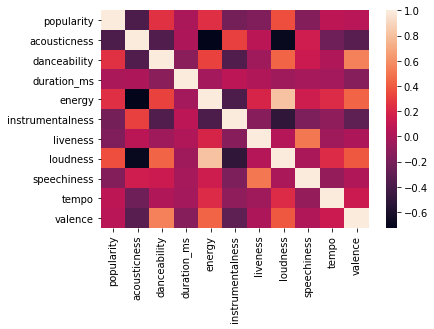

In [9]:
sns.heatmap(spotify.corr())

Here we can see the correlation between all the features in our data!

From first glance I can tell that, Energy and Loudness seem to have a linear relationship between eachother

In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

Lets make histograms to observe how are data is shown in our dataframe

HISTOGRAM of popularity


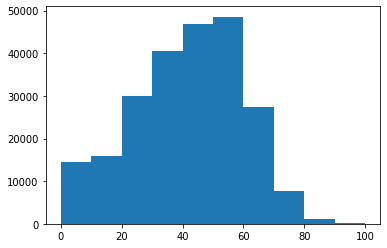

In [10]:
  plt.hist(spotify['popularity'])
  print('HISTOGRAM of popularity')

HISTOGRAM of acousticness


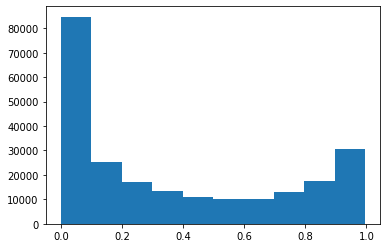

In [11]:
  plt.hist(spotify['acousticness'])
  print('HISTOGRAM of acousticness')

HISTOGRAM of danceability


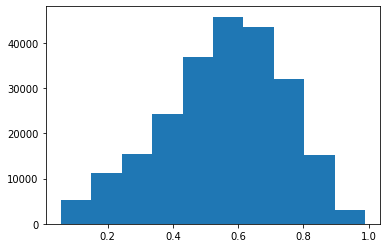

In [12]:
  plt.hist(spotify['danceability'])
  print('HISTOGRAM of danceability')

HISTOGRAM of energy


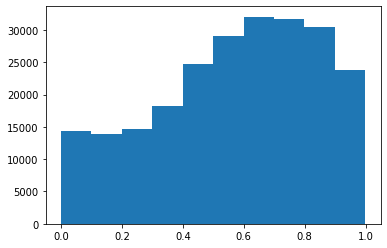

In [13]:
  plt.hist(spotify['energy'])
  print('HISTOGRAM of energy')

HISTOGRAM of instrumentalness


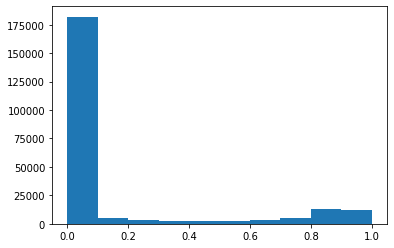

In [14]:
  plt.hist(spotify['instrumentalness'])
  print('HISTOGRAM of instrumentalness')

HISTOGRAM of liveness


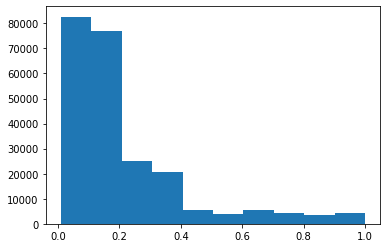

In [15]:
  plt.hist(spotify['liveness'])
  print('HISTOGRAM of liveness')

HISTOGRAM of speechiness


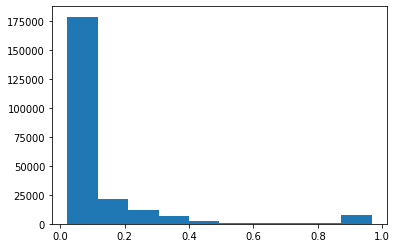

In [16]:
  plt.hist(spotify['speechiness'])
  print('HISTOGRAM of speechiness')

HISTOGRAM of tempo


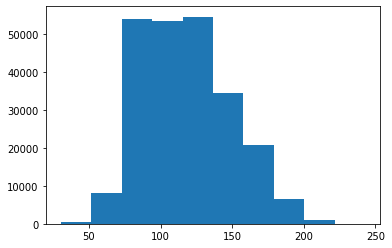

In [17]:
  plt.hist(spotify['tempo'])
  print('HISTOGRAM of tempo')

HISTOGRAM of valence


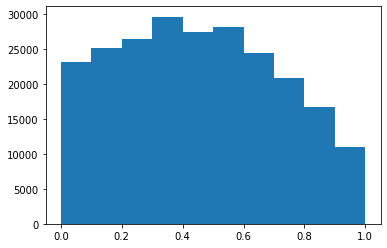

In [18]:
  plt.hist(spotify['valence'])
  print('HISTOGRAM of valence')

# Visualizing the multidimensional relationships among the songs



**Let's add a dimensional column to our data frame**
Popularity seems to be very opinionated, to be popular a song (at least in my opinion) needs to be trendy. So lets add that, a class called 'trendy'.

In [0]:
category = pd.cut(spotify['popularity'],bins=[-1,25,50,75,100],labels=['1','2','3','4'])
spotify.insert(5,'trendy',category)

In [20]:
spotify.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 19 columns]

In [21]:
spotify['trendy'].value_counts(normalize=True)

2    0.460827
3    0.329341
1    0.197130
4    0.012702
Name: trendy, dtype: float64

HISTOGRAM of trendy


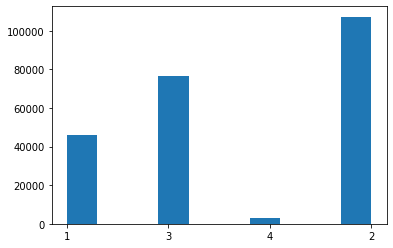

In [22]:
  plt.hist(spotify['trendy'])
  print('HISTOGRAM of trendy')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


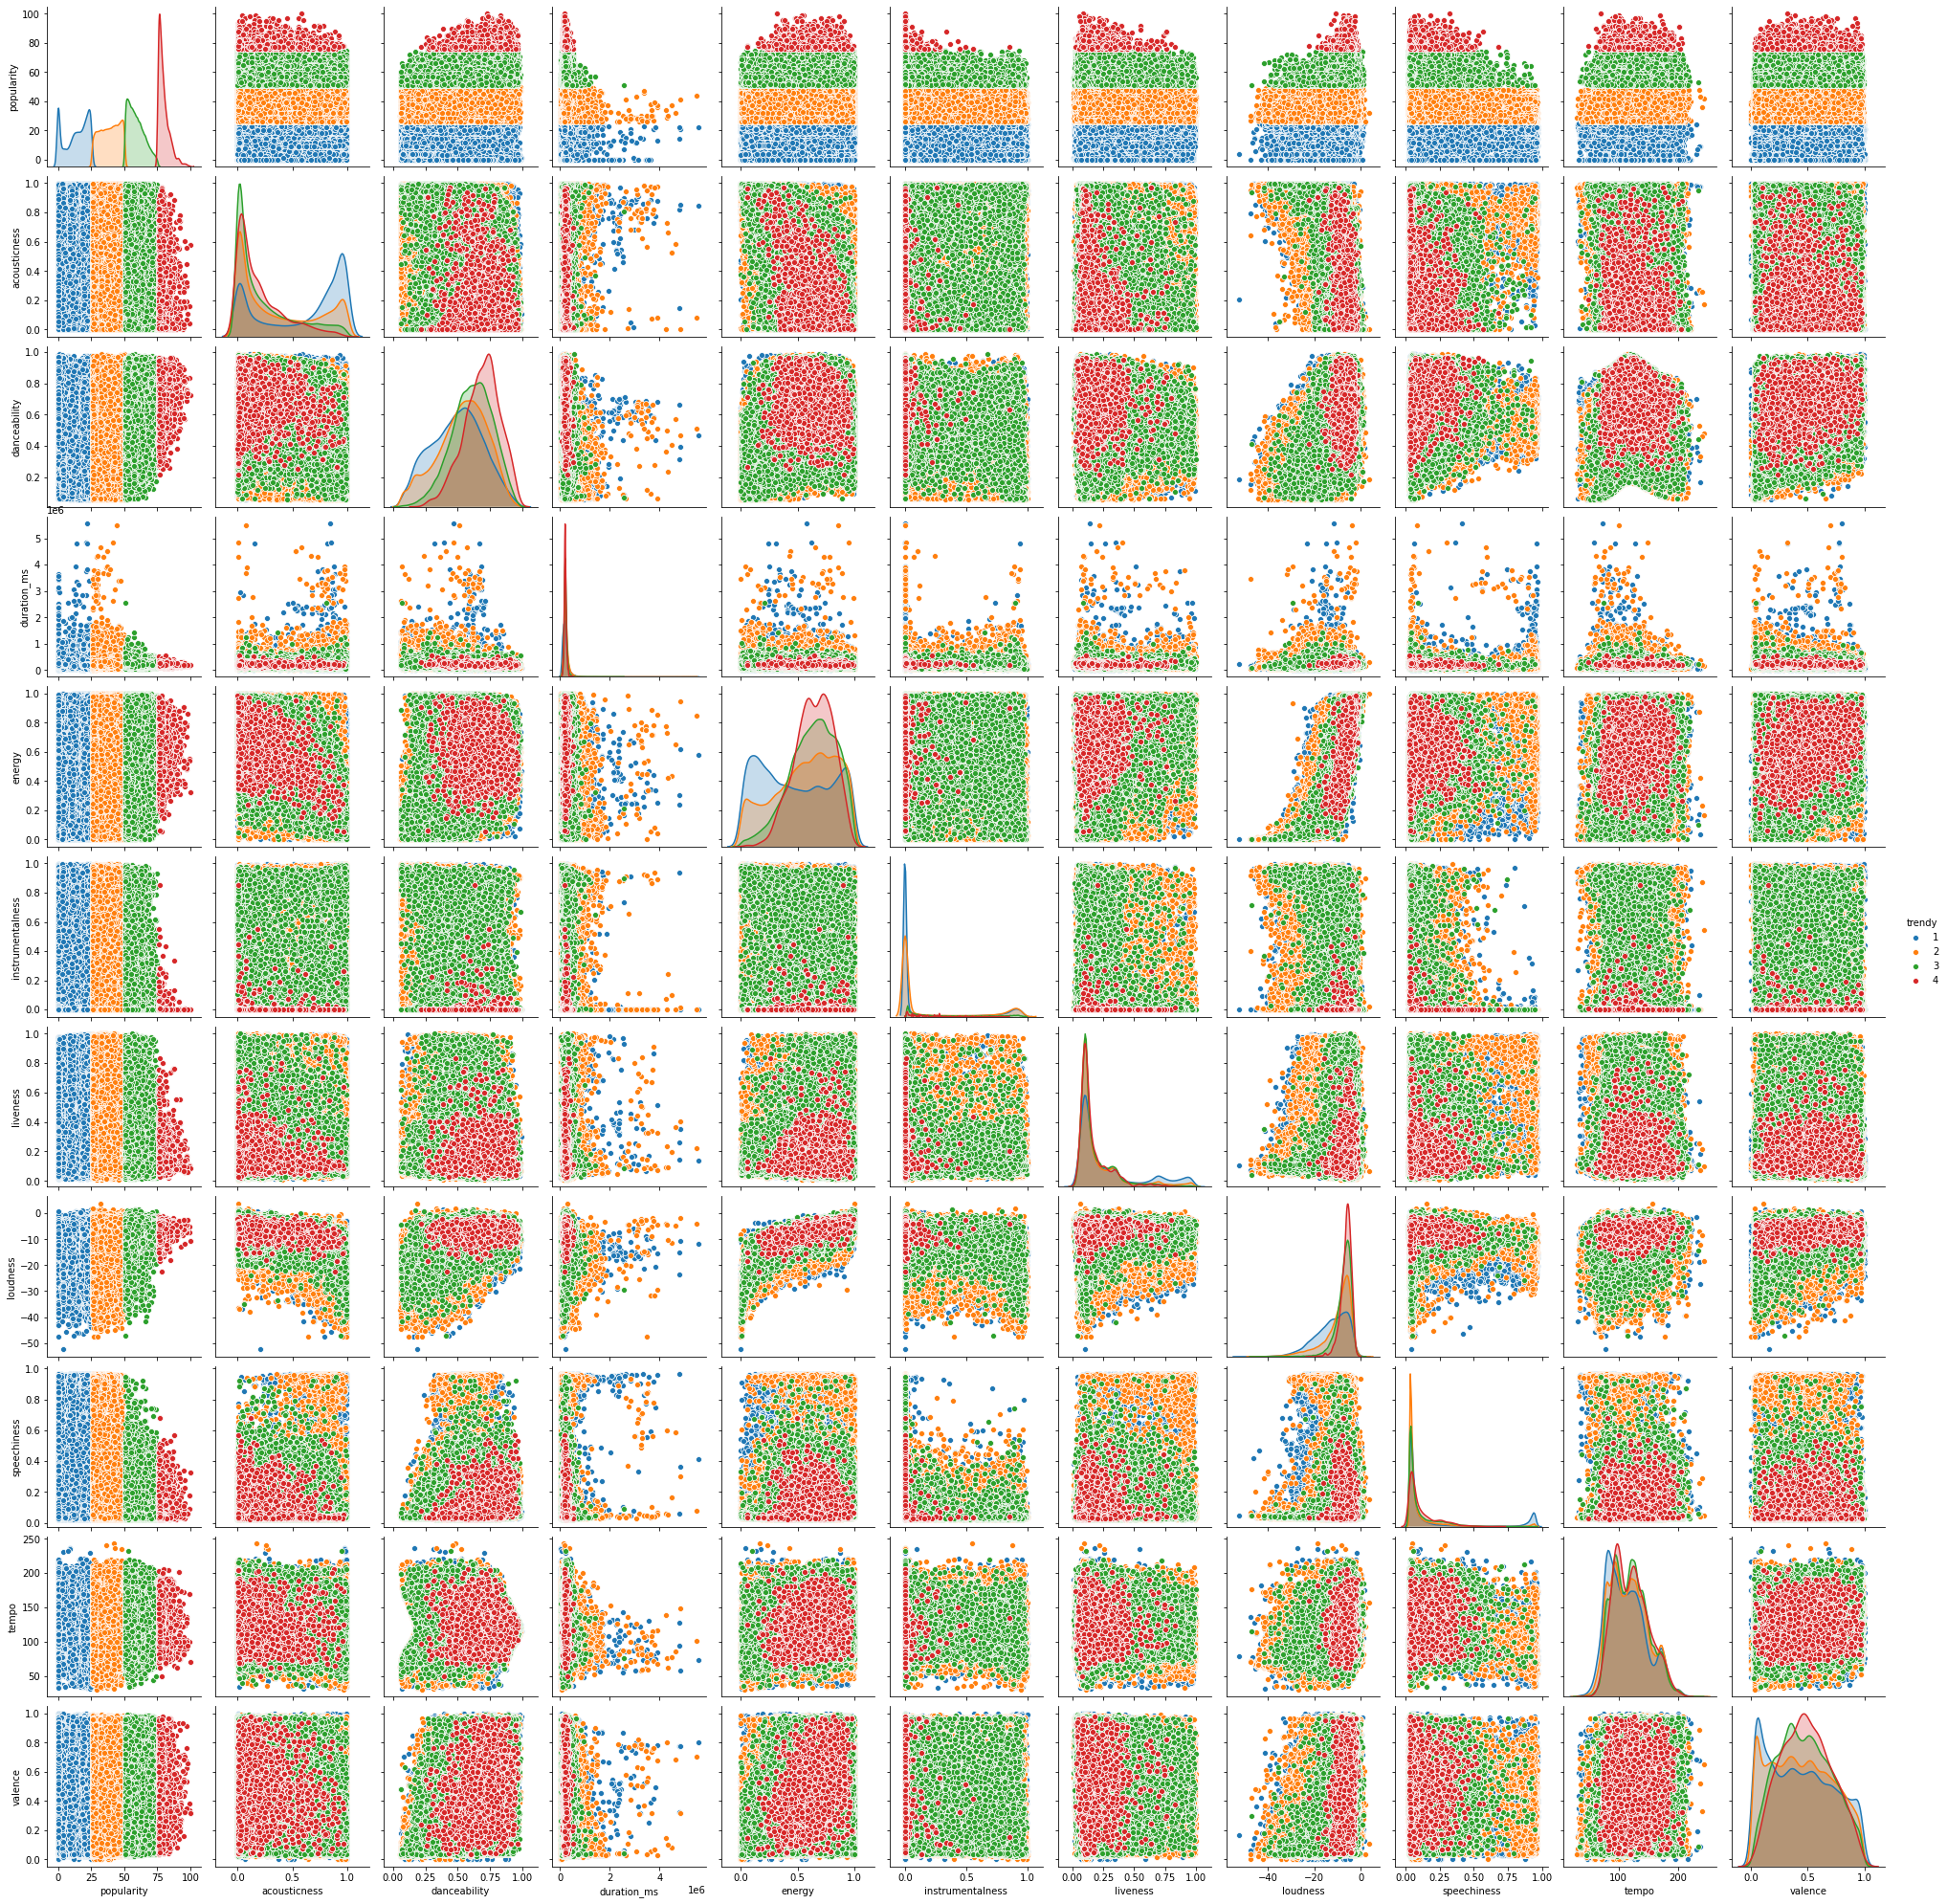

In [23]:
sns.pairplot(spotify, hue='trendy', size=2.5);

# **CHECK THAT OUT! How cool!**

Okay, so what we can see from these decpitions, is that the songs popularity does infact have some kind of relationship to these dimensional variables. Theoretically, if we were to implement all of our data science model, we could create a model to predict wether a song could be popular given a certain vector of inputs for our dimensions.
